## TP 5 &ndash; Géométrie des courbes

Noms des coéquipiers : <span style="color: red">Judith Lecoq - Elliott Vanwormhoudt</span>

On trace facilement des courbes paramétrées avec Sage : voir les commandes `parametric_plot`, `polar_plot` et `parametric_plot3d`.

### 1) Premier exemple

Voici par exemple une cycloïde, définie par la fonction _vectorielle_ $t \mapsto M(t) = (t - \sin t, 1 - \cos t)$.

In [2]:
var('t')

M = vector([t - sin(t), 1 - cos(t)])

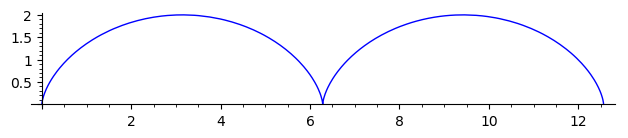

In [3]:
parametric_plot( M(t), (t,0,4*pi) )

Il s'agit de la courbe décrite par un point sur la circonférence d'une roue qui roule sans glisser sur l'axe des $x$ ; tâchons de visualiser ceci.

In [4]:
def frame(T):

    img = Graphics()                                    # initialisation

    img += parametric_plot( M, (t,0,4*pi) )             # cycloïde
    img += circle((T,1), 1, color="black")              # roue
    img += point( M(t=T), size=20 )                     # point marqué
    
    return img

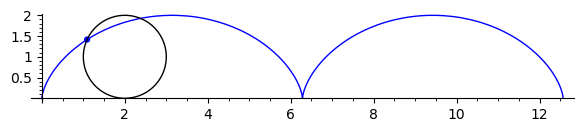

In [5]:
frame(2)

Voyons le tout en mouvement (attention, l'affichage est long si le pas est petit, mieux vaut l'augmenter pour expérimenter).

In [6]:
a = animate( [ frame(T) for T in sxrange(0,4*pi,.1) ], xmin=0, xmax=4*pi )

Animation with 126 frames
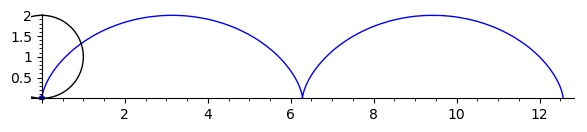

In [7]:
a.show(delay=5)  # attention : long

L'intérêt de travailler avec une expression vectorielle pour définir la courbe est qu'on peut facilement la manipuler : par exemple

In [8]:
der = diff(M, t)
der  # vecteur dérivé

(-cos(t) + 1, sin(t))

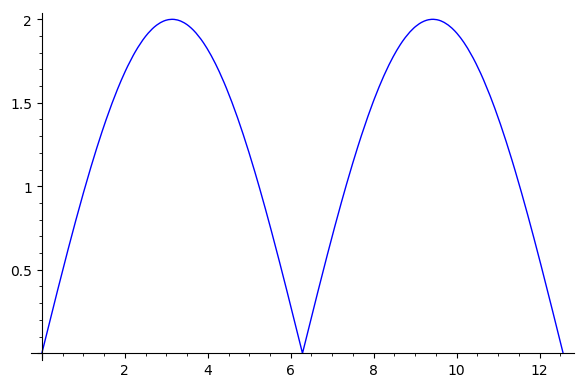

In [9]:
v = norm(der)  # vitesse scalaire
plot(v,(t,0,4*pi))

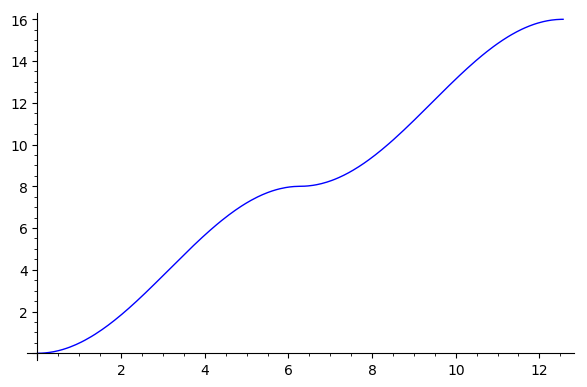

In [10]:
def abs_curviligne(u):
    return numerical_integral(v,0,u)[0]

plot(abs_curviligne,(0,4*pi))  # abscisse curviligne en fonction de t

In [11]:
2*M + der  # une combinaison linéaire

(2*t - cos(t) - 2*sin(t) + 1, -2*cos(t) + sin(t) + 2)

**À faire** :

a) Réaliser une animation du repère mobile orthonormé $(\vec{T},\vec{N})$ se déplaçant le long de la courbe.

In [12]:
T = der/v
N = matrix([[0,-1],[1,0]]) * T 

def frame(u):
    img = parametric_plot(M,(t,0,4*pi))
    try:
        Mu, Tu, Nu = M(t=u), T(t=u), N(t=u)
        img += point(Mu, color="black", size=20)
        img += arrow(Mu, Mu+Tu, color="black")
        img += arrow(Mu, Mu+Nu, color="black")
        
    except :
        pass

    return img

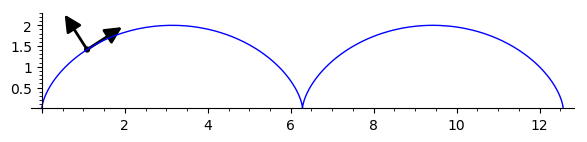

In [13]:
frame(2)

In [14]:
a = animate([frame(T) for T in sxrange(0,4*pi,.1)], xmin = 0, xmax=4*pi, ymin=-.5, ymax =2.5)

Animation with 126 frames
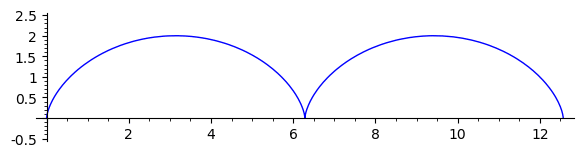

In [15]:
show(a, delay=5)

b) Même chose mais cette fois-ci en visualisant le déplacement du cercle de courbure le long de la courbe.

_Rappel_ : si $c(t)$ désigne la courbure en $M(t)$ et $R(t) = 1/c(t)$ le rayon de courbure, il s'agit du cercle de centre $M(t) + R(t) \vec{N}(t)$ et de rayon $R(t)$.

In [16]:
derT = diff(T,t)
c=derT*N/v
R = 1/c

def frame(u):
    img = parametric_plot(M,(t,0,4*pi))
    try : 
        Mu, Nu, Ru = M(t=u), N(t=u), R(t=u)
        img += point(Mu, color="black", size=20)
        img += circle(Mu +Ru*Nu, Ru, color="black")
    except:
         pass
    return img

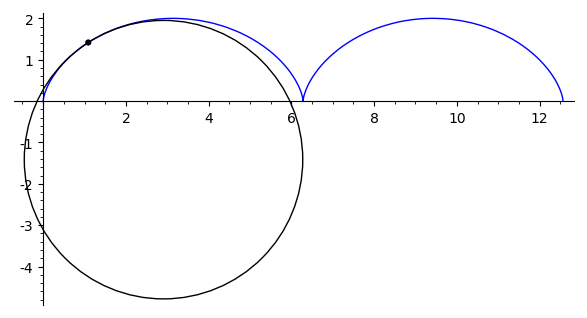

In [17]:
frame(2)

In [18]:
a = animate( [frame(T) for T in sxrange(0,4*pi,.1)], xmin=0, xmax = 4*pi, ymin=-.5, ymax=2.5)

Animation with 126 frames
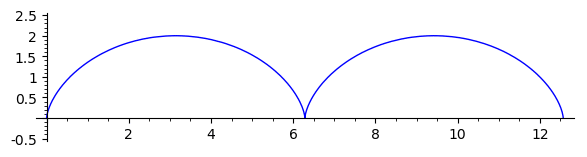

In [19]:
show(a, delay=5)

### 2) Un autre exemple

Reprendre l'exercice 1 en remplaçant la cycloïde par une _courbe plane en coordonées cartésiennes_ de votre choix. Si vous êtes en manque d'inspiration, vous pouvez explorer ce qu'on trouve sur le site [MathCurve](https://mathcurve.com/courbes2d/courbes2d.shtml).

Précisez bien (dans une cellule texte) quelle est la courbe choisie, les équations paramétriques et l'intervalle d'étude.

LEMNISCATE DE GERONO, ou HUIT :<br/>
Equation paramétrique : x = sin(t) et y = cos(t)sin(t) <br/>
intervalle d'etude : [0,2π]

a) Repère mobile

Animation with 126 frames
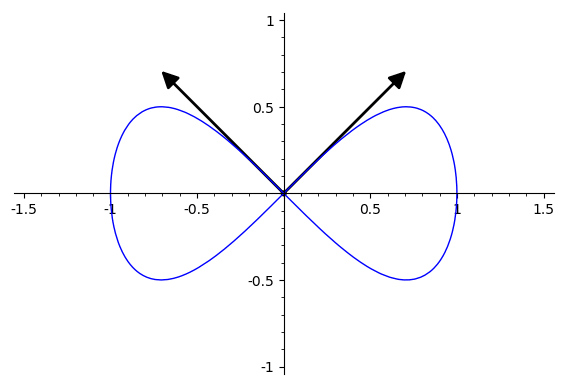

In [48]:
reset()
var('t')

M = vector([sin(t),cos(t)*sin(t)])
parametric_plot( M(t), (t,0,2*pi) )

der = diff(M, t)
v = norm(der)  

T = der/v
N = matrix([[0,-1],[1,0]]) * T 


def frame(u):
    img = parametric_plot(M,(t,0,2*pi))
    try:
        Mu, Tu, Nu = M(t=u), T(t=u), N(t=u)
        img += point(Mu, color="black", size=20)
        img += arrow(Mu, Mu+Tu, color="black")
        img += arrow(Mu, Mu+Nu, color="black")
        
    except :
        pass

    return img

a = animate([frame(T) for T in sxrange(0,4*pi,.1)], xmin = -1.5, xmax=1.5, ymin=-1, ymax =1)
show(a, delay=5)

b) Cercle de courbure

Animation with 252 frames
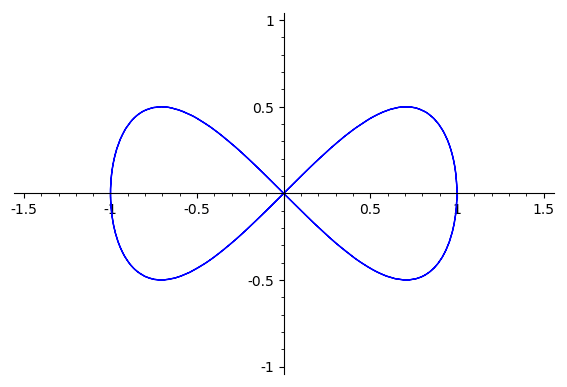

In [49]:
derT = diff(T,t)
c=derT*N/v
R = 1/c

def frame(u):
    img = parametric_plot(M,(t,0,4*pi))
    try : 
        Mu, Nu, Ru = M(t=u), N(t=u), R(t=u)
        img += point(Mu, color="black", size=20)
        img += circle(Mu +Ru*Nu, Ru, color="black")
    except:
         pass
    return img

a = animate( [frame(T) for T in sxrange(0,4*pi,.05)], xmin = -1.5, xmax=1.5, ymin=-1, ymax =1)

show(a, delay=5)

### 3) Une courbe polaire

Reprendre l'exercice 2, mais cette fois avec une _courbe plane en coordonnées polaires_.

Papillon :<br/>
Equation polaire : ρ(t)= sin(7*th)-3*cos(2*th) - 1 <br/>
intervalle d'etude : [0,2π]

a) Repère mobile

Animation with 126 frames
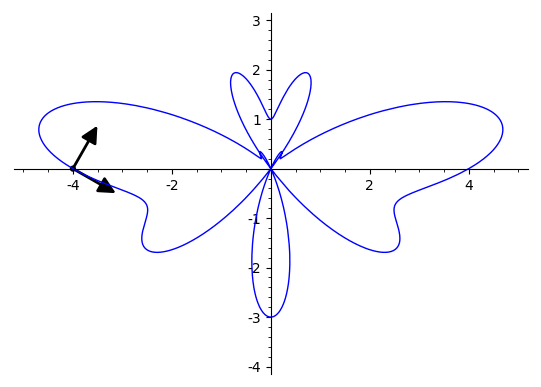

In [52]:
reset()
var('th')

M = vector([(sin(7*th)-3*cos(2*th)-1)*cos(th),(sin(7*th)-3*cos(2*th)-1)*sin(th)])
rho = sin(7*th)-3*cos(2*th) - 1

der = diff(M, th)
v = norm(der)  

T = der/v
N = matrix([[0,-1],[1,0]]) * T 


def frame(u):
    img = polar_plot(rho,(th,0,2*pi))
    try:
        Mu, Tu, Nu = M(th=u), T(th=u), N(th=u)
        img += point(Mu, color="black", size=20)
        img += arrow(Mu, Mu+Tu, color="black")
        img += arrow(Mu, Mu+Nu, color="black")
        
    except :
        pass

    return img

a = animate([frame(T) for T in sxrange(0,2*pi,.05)], xmin = -5, xmax=5, ymin=-4, ymax =3)
show(a, delay=5)

b) Cercle de courbure

Animation with 126 frames
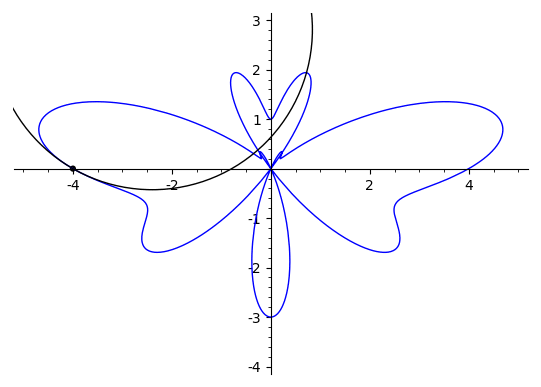

In [53]:
derT = diff(T,th)
c=derT*N/v
R = 1/c

def frame(u):
    img = polar_plot(rho,(th,0,2*pi))
    try : 
        Mu, Nu, Ru = M(th=u), N(th=u), R(th=u)
        img += point(Mu, color="black", size=20)
        img += circle(Mu +Ru*Nu, Ru, color="black")
    except:
         pass
    return img

a = animate( [frame(T) for T in sxrange(0,2*pi,.05)],xmin = -5, xmax=5, ymin=-4, ymax =3)

show(a, delay=5)

Vous pouvez poster vos plus belles créations sur Teams dans votre canal de TP.